<a href="https://colab.research.google.com/github/abhinava-sai/Multi-Class-Classification-Using-ANN/blob/main/Multi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi Class Classification Using ANN


In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Step 2: Load and preprocess the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the images from 0-255 to 0-1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the data for ANN (samples, features)
X_train_flattened = X_train.reshape(-1, 28 * 28)
X_test_flattened = X_test.reshape(-1, 28 * 28)

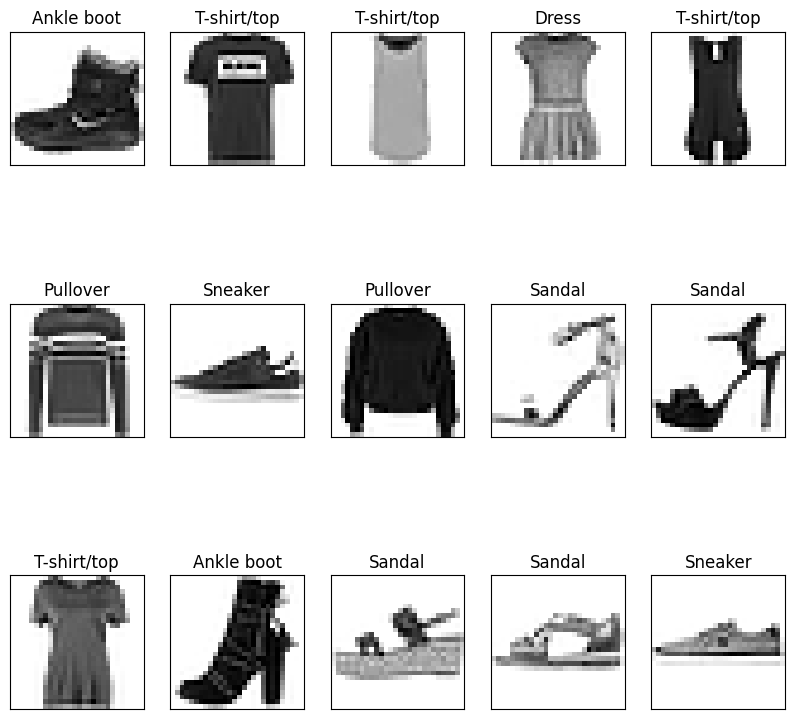

In [ ]:
# Step 3: Visualize sample images from Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]])
plt.show()

<ipython-input-90-f2a6191cd730>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


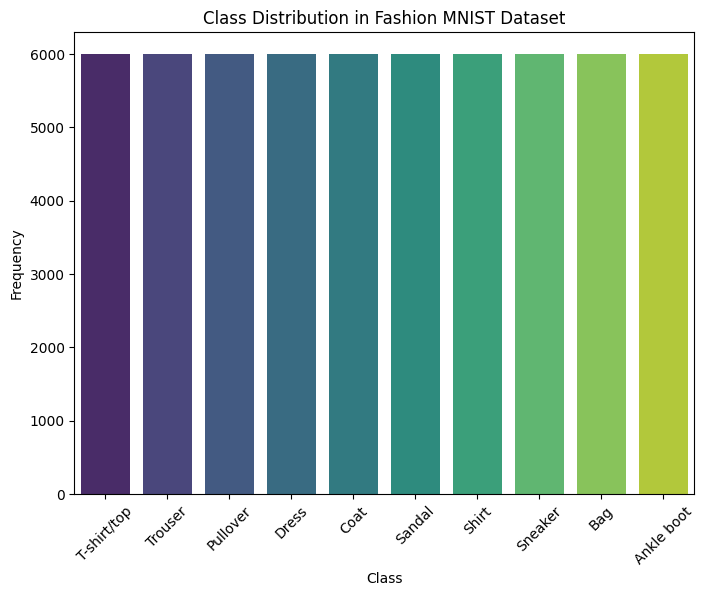

In [ ]:
# Step 4: Visualize class distribution
plt.figure(figsize=(8,6))
sns.countplot(x=y_train, palette="viridis")
plt.title('Class Distribution in Fashion MNIST Dataset')
plt.xticks(np.arange(10), class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Step 5: Build the ANN model with improvements
model = Sequential()

# Input layer
model.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation

# Batch normalization and dropout
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer (10 classes for Fashion MNIST)
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Step 6: Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 7: Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Step 8: Train the model
history = model.fit(X_train_flattened, y_train,
                    validation_data=(X_test_flattened, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7540 - loss: 0.7038 - val_accuracy: 0.8313 - val_loss: 0.4651
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8327 - loss: 0.4690 - val_accuracy: 0.8313 - val_loss: 0.4744
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8421 - loss: 0.4399 - val_accuracy: 0.8540 - val_loss: 0.4009
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8457 - loss: 0.4195 - val_accuracy: 0.8563 - val_loss: 0.3955
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8579 - loss: 0.3896 - val_accuracy: 0.8643 - val_loss: 0.3745
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8630 - loss: 0.3796 - val_accuracy: 0.8617 - val_loss: 0.3742
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8619 - loss: 0.3775 - val_accuracy: 0.8600 - val_loss: 0.3887
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8693 - loss:

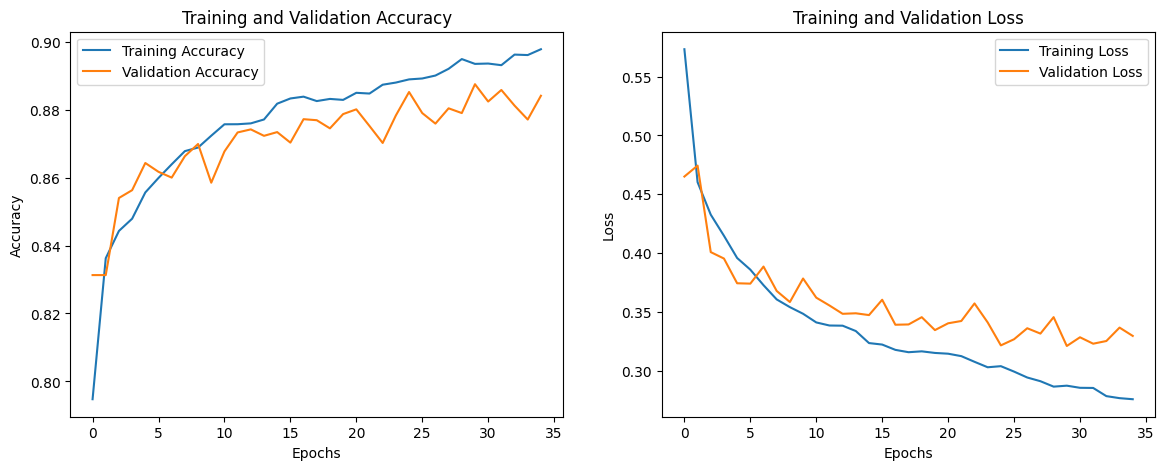

In [ ]:
# Step 9: Visualize training accuracy and loss over epochs
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Step 10: Evaluate the model
test_loss, test_acc = model.evaluate(X_test_flattened, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8887 - loss: 0.3169
Test Accuracy: 0.887499988079071


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


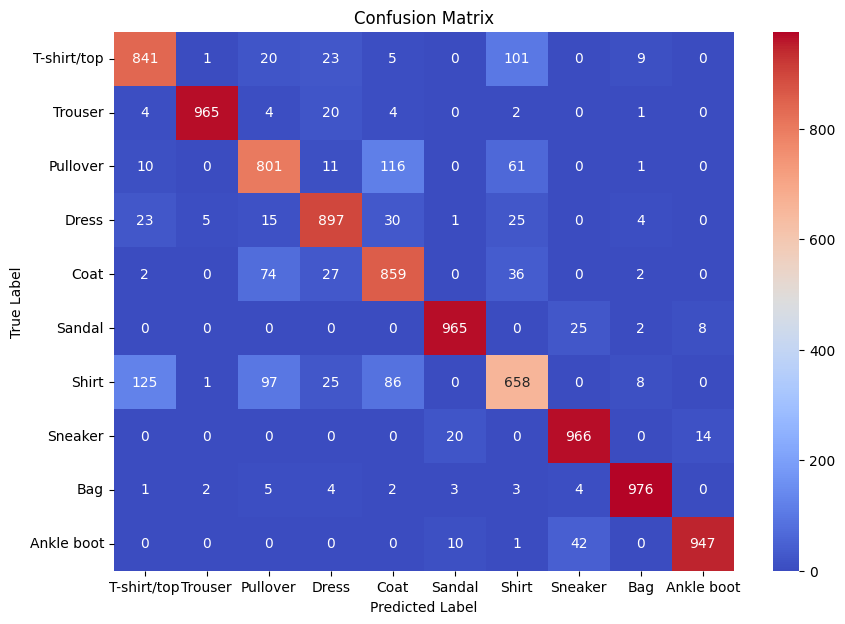

In [ ]:
# Step 11: Confusion matrix visualization
y_pred = model.predict(X_test_flattened)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<Figure size 1200x800 with 0 Axes>

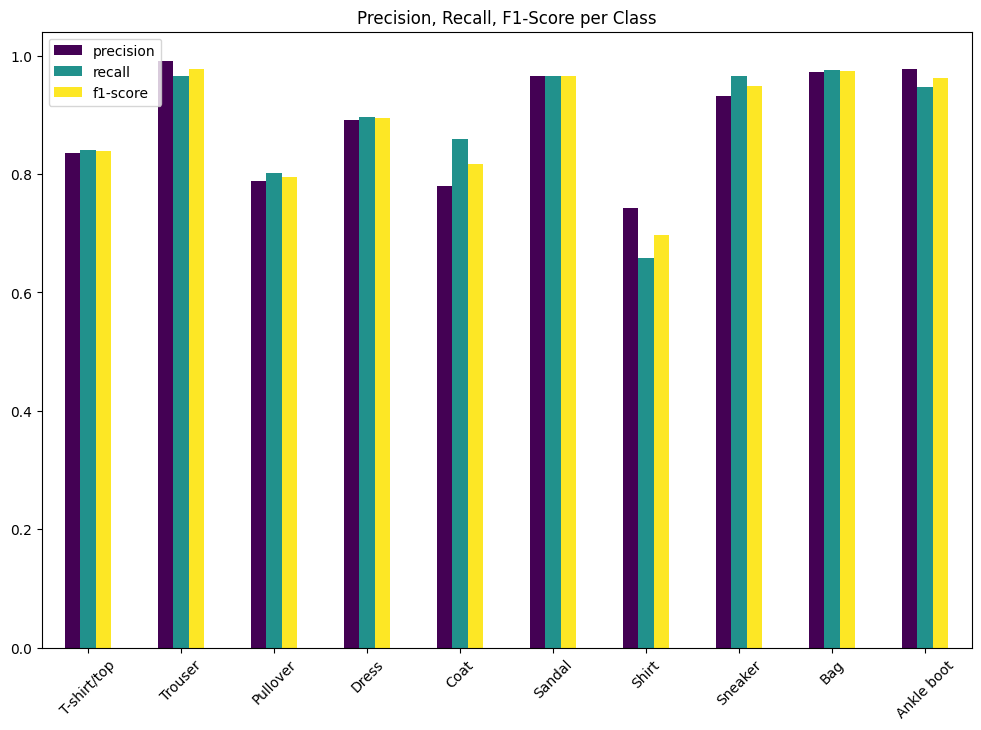

In [ ]:
# Step 12: Classification report and metrics visualization
report = classification_report(y_test, y_pred_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot the precision, recall, and f1-score for each class
plt.figure(figsize=(12,8))
df_report.iloc[:-3, :-1].plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Precision, Recall, F1-Score per Class')
plt.xticks(range(10), class_names, rotation=45)
plt.show()